# Importing the Libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
from scipy.stats import shapiro, kstest, iqr, friedmanchisquare, ttest_rel, wilcoxon

import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM, anova_lm
from statsmodels.stats.multitest import multipletests
import pingouin as pg
import warnings
import statsmodels.formula.api as smf

# Ignore all warnings
warnings.filterwarnings("ignore")

# %matplotlib qt

# Loading the Data

In [84]:
# Experiment A
Data_exp1_mean = pd.read_excel("CoffeeImagery_AveragedDataExp1_20220824.xlsx")
Data_exp1_mean

,Participant,ID,Sex,Age,Baseline,Description_type,VOI,DTT,WTP,WTPM,...,Imagery3,Imagery4,Imagery5,Imagery6,ImagerySmell,ImageryFeel,ImageryTaste,ImageryM,Notice,NoticeText
0,1,R_2DUdB9mszOgnM3X,Female,19,7.10,Abstract,2.8,2.8,1.504,1.2185,...,4,5,5,5,4.5,5.0,4.5,4.666667,No,NaN
1,1,R_2DUdB9mszOgnM3X,Female,19,7.10,Combination,1.6,2.0,1.030,1.2185,...,4,5,5,5,4.5,5.0,4.5,4.666667,No,NaN
2,1,R_2DUdB9mszOgnM3X,Female,19,7.10,Evaluative,3.2,3.2,2.200,1.2185,...,4,5,5,5,4.5,5.0,4.5,4.666667,No,NaN
3,1,R_2DUdB9mszOgnM3X,Female,19,7.10,Source-based,1.0,1.0,0.140,1.2185,...,4,5,5,5,4.5,5.0,4.5,4.666667,No,NaN
4,2,R_3g5RyAsUGn5YAr1,Female,37,9.73,Abstract,2.6,2.4,6.294,6.3360,...,5,5,4,3,5.0,4.5,4.0,4.500000,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,39,R_3CWasnEjqYbK566,Male,23,20.00,Source-based,4.0,4.0,15.746,15.4505,...,5,5,5,5,5.0,5.0,5.0,5.000000,No,NaN
156,40,R_3s0yiAaiI5daHDc,Female,23,5.79,Abstract,4.4,3.6,5.962,5.4485,...,4,3,4,4,4.0,3.5,4.0,3.833333,Yes,the taste /flavour or feelings induced when dr...
157,40,R_3s0yiAaiI5daHDc,Female,23,5.79,Combination,4.0,3.6,4.826,5.4485,...,4,3,4,4,4.0,3.5,4.0,3.833333,Yes,the taste /flavour or feelings induced when dr...
158,40,R_3s0yiAaiI5daHDc,Female,23,5.79,Evaluative,3.6,3.6,4.740,5.4485,...,4,3,4,4,4.0,3.5,4.0,3.833333,Yes,the taste /flavour or feelings induced when dr...


# Visualizing the data (boxplots)

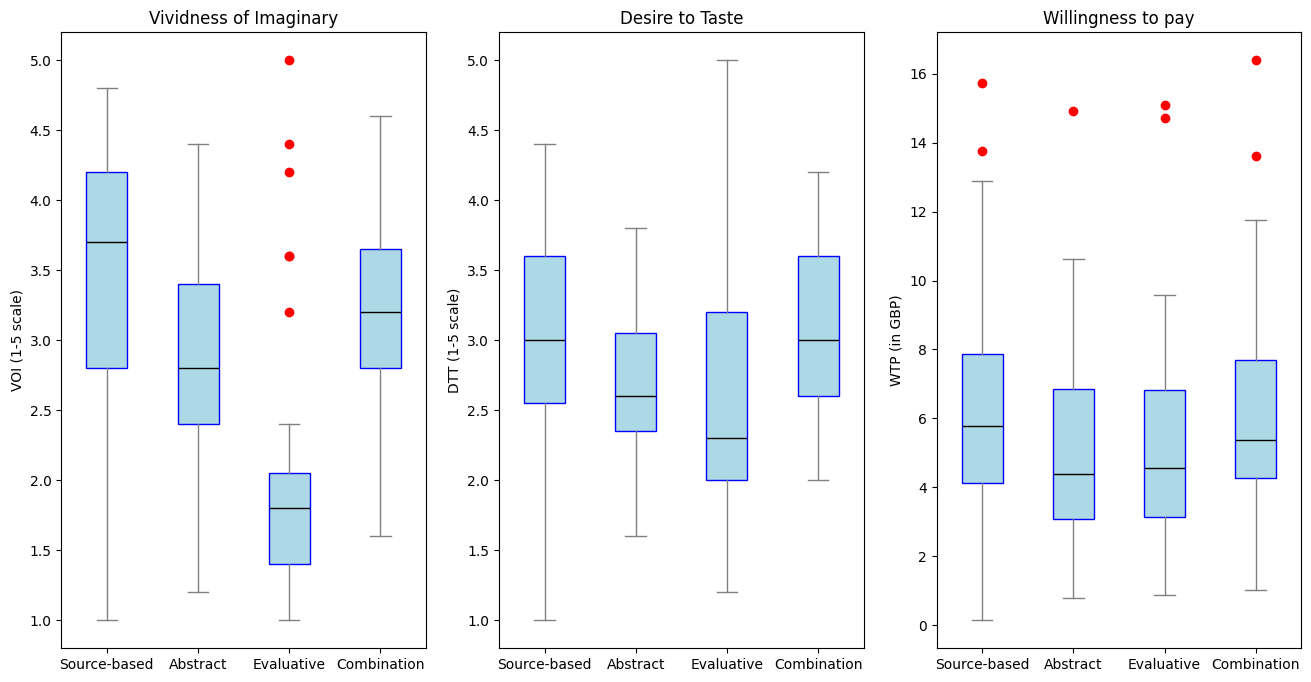

In [85]:
# Vividness of Imaginery 
VOI = Data_exp1_mean[["Participant", "Description_type", "VOI"]]

# Desire to Test
DTT = Data_exp1_mean[["Participant", "Description_type", "DTT"]]

# Willingness to Pay
WTP = Data_exp1_mean[["Participant", "Description_type", "WTP"]]

# VOI
VOI1 = VOI[VOI["Description_type"]=="Source-based"]["VOI"].values
VOI2 = VOI[VOI["Description_type"]=="Abstract"]["VOI"].values
VOI3 = VOI[VOI["Description_type"]=="Evaluative"]["VOI"].values
VOI4 = VOI[VOI["Description_type"]=="Combination"]["VOI"].values

DTT1 = DTT[DTT["Description_type"]=="Source-based"]["DTT"].values
DTT2 = DTT[DTT["Description_type"]=="Abstract"]["DTT"].values
DTT3 = DTT[DTT["Description_type"]=="Evaluative"]["DTT"].values
DTT4 = DTT[DTT["Description_type"]=="Combination"]["DTT"].values

WTP1 = WTP[WTP["Description_type"]=="Source-based"]["WTP"].values
WTP2 = WTP[WTP["Description_type"]=="Abstract"]["WTP"].values
WTP3 = WTP[WTP["Description_type"]=="Evaluative"]["WTP"].values
WTP4 = WTP[WTP["Description_type"]=="Combination"]["WTP"].values

# Create a figure and axis object
fig, ax = plt.subplots(1, 3, figsize=(16, 8))

# Create a box plot with custom styling for VOI
boxplot = ax[0].boxplot(
    [VOI1, VOI2, VOI3, VOI4],
    labels=['Source-based', 'Abstract', 'Evaluative', 'Combination'],
    patch_artist=True,  # For filled boxes
    medianprops={'color': 'black'},  # Median line color
    boxprops={'facecolor': 'lightblue', 'edgecolor': 'blue'},  # Box color and edge color
    whiskerprops={'color': 'gray'},  # Whisker color
    capprops={'color': 'gray'},  # Caps on whiskers color
    flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'red'},  # Outlier marker
)

# Create a box plot with custom styling for DTT
boxplot = ax[1].boxplot(
    [DTT1, DTT2, DTT3, DTT4],
    labels=['Source-based', 'Abstract', 'Evaluative', 'Combination'],
    patch_artist=True,  # For filled boxes
    medianprops={'color': 'black'},  # Median line color
    boxprops={'facecolor': 'lightblue', 'edgecolor': 'blue'},  # Box color and edge color
    whiskerprops={'color': 'gray'},  # Whisker color
    capprops={'color': 'gray'},  # Caps on whiskers color
    flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'red'},  # Outlier marker
)

# Create a box plot with custom styling for WTP
boxplot = ax[2].boxplot(
    [WTP1, WTP2, WTP3, WTP4],
    labels=['Source-based', 'Abstract', 'Evaluative', 'Combination'],
    patch_artist=True,  # For filled boxes
    medianprops={'color': 'black'},  # Median line color
    boxprops={'facecolor': 'lightblue', 'edgecolor': 'blue'},  # Box color and edge color
    whiskerprops={'color': 'gray'},  # Whisker color
    capprops={'color': 'gray'},  # Caps on whiskers color
    flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'red'},  # Outlier marker
)

# Add labels and title
ax[0].set_ylabel('VOI (1-5 scale)')
ax[0].set_title('Vividness of Imaginary')

ax[1].set_ylabel('DTT (1-5 scale)')
ax[1].set_title('Desire to Taste')

ax[2].set_ylabel('WTP (in GBP)')
ax[2].set_title('Willingness to pay')

# Show the plot
plt.show()


# Removing the outliers

In [86]:
print(WTP[WTP["WTP"]>14])

WTP_r = WTP[~(WTP["Participant"] == 39)]
DTT_r = DTT[~(DTT["Participant"] == 39)]
VOI_r = VOI[~(VOI["Participant"] == 39)]

Data_exp1_mean_r = Data_exp1_mean[-(Data_exp1_mean["Participant"] == 39)]

     Participant Description_type     WTP
130           33       Evaluative  15.098
152           39         Abstract  14.930
153           39      Combination  16.394
154           39       Evaluative  14.732
155           39     Source-based  15.746


# Checking Normality

## WTP (Willingness to Pay)

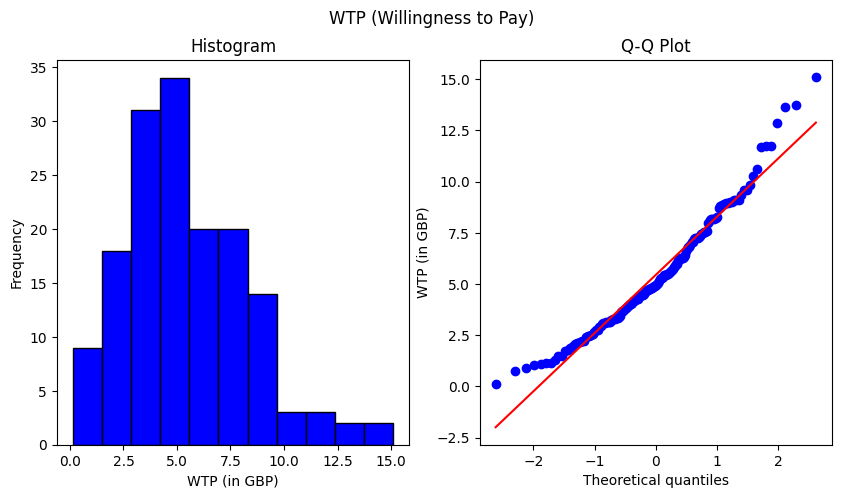

Shapiro-Wilk Test:
Statistic=0.962, p-value=0.0003
The data does not appear to be normally distributed.


Kolmogorov-Smirnov Test:
Statistic=0.893, p-value=0.0
The data does not appear to be normally distributed.


In [5]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))

# Plot histogram

fig.suptitle('WTP (Willingness to Pay)')
ax[0].hist(WTP_r["WTP"].values, bins='auto', color='blue', edgecolor='black')
ax[0].set_xlabel('WTP (in GBP)')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram')

# Plot QQ-plot

stats.probplot(WTP_r["WTP"].values, plot=ax[1], fit=True)
ax[1].set_ylabel('WTP (in GBP)')
ax[1].set_title('Q-Q Plot')

plt.show()

# Shapiro-Wilk Test

stat, p_value = shapiro(WTP_r["WTP"].values)
print(f'Shapiro-Wilk Test:\nStatistic={round(stat, 3)}, p-value={round(p_value, 4)}')

if p_value > 0.01:
    print('The data appears to be normally distributed.')
else:
    print('The data does not appear to be normally distributed.\n\n')


# Kolmogorov-Smirnov Test:

stat, p_value = kstest(WTP_r["WTP"].values, 'norm')
print(f'Kolmogorov-Smirnov Test:\nStatistic={round(stat, 3)}, p-value={round(p_value, 4)}')

if p_value > 0.01:
    print('The data appears to be normally distributed.')
else:
    print('The data does not appear to be normally distributed.')

## DTT (Desire to Taste)

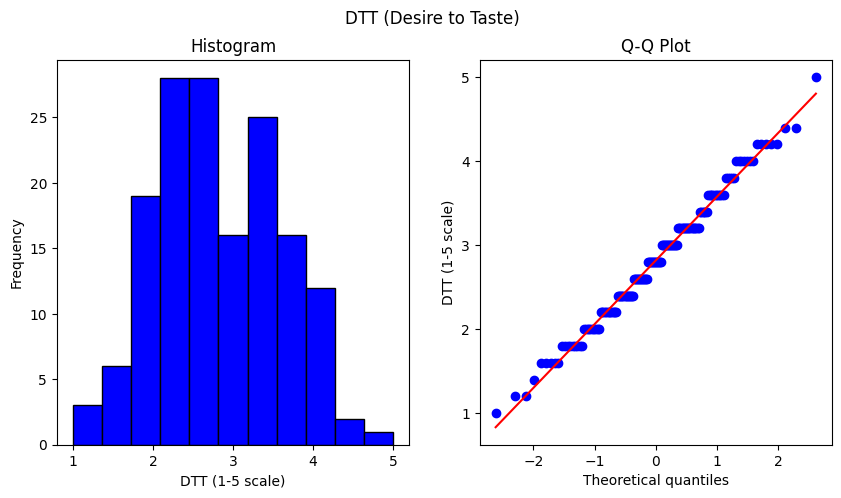

Shapiro-Wilk Test:
Statistic=0.989, p-value=0.2484
The data appears to be normally distributed.


Kolmogorov-Smirnov Test:
Statistic=0.92, p-value=0.0
The data does not appear to be normally distributed.


In [6]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))

# Plot histogram

fig.suptitle('DTT (Desire to Taste)')
ax[0].hist(DTT_r["DTT"].values, bins='auto', color='blue', edgecolor='black')
ax[0].set_xlabel('DTT (1-5 scale)')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram')

# Plot QQ-plot

stats.probplot(DTT_r["DTT"].values, plot=ax[1], fit=True)
ax[1].set_ylabel('DTT (1-5 scale)')
ax[1].set_title('Q-Q Plot')

plt.show()

# Shapiro-Wilk Test

stat, p_value = shapiro(DTT_r["DTT"].values)
print(f'Shapiro-Wilk Test:\nStatistic={round(stat, 3)}, p-value={round(p_value, 4)}')

if p_value > 0.01:
    print('The data appears to be normally distributed.')
else:
    print('The data does not appear to be normally distributed.\n\n')


# Kolmogorov-Smirnov Test:

stat, p_value = kstest(DTT_r["DTT"].values, 'norm')
print(f'\n\nKolmogorov-Smirnov Test:\nStatistic={round(stat, 3)}, p-value={round(p_value, 4)}')

if p_value > 0.01:
    print('The data appears to be normally distributed.')
else:
    print('The data does not appear to be normally distributed.')

## VOI (Vividness of Imaginery)

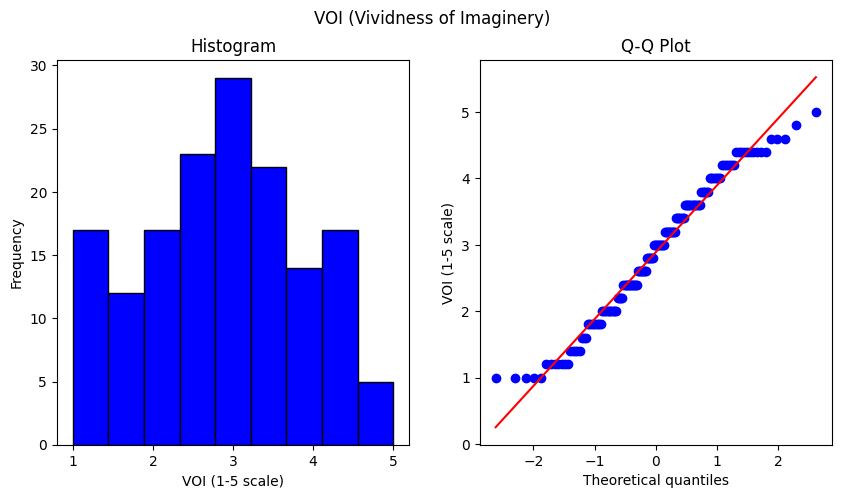

Shapiro-Wilk Test:
Statistic=0.972, p-value=0.0026
The data does not appear to be normally distributed.


Kolmogorov-Smirnov Test:
Statistic=0.853, p-value=0.0
The data does not appear to be normally distributed.


In [7]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))

# Plot histogram

fig.suptitle('VOI (Vividness of Imaginery)')
ax[0].hist(VOI_r["VOI"].values, bins='auto', color='blue', edgecolor='black')
ax[0].set_xlabel('VOI (1-5 scale)')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram')

# Plot QQ-plot

stats.probplot(VOI_r["VOI"].values, plot=ax[1], fit=True)
ax[1].set_ylabel('VOI (1-5 scale)')
ax[1].set_title('Q-Q Plot')

plt.show()

# Shapiro-Wilk Test

stat, p_value = shapiro(VOI_r["VOI"].values)
print(f'Shapiro-Wilk Test:\nStatistic={round(stat, 3)}, p-value={round(p_value, 4)}')

if p_value > 0.01:
    print('The data appears to be normally distributed.')
else:
    print('The data does not appear to be normally distributed.\n\n')


# Kolmogorov-Smirnov Test:

stat, p_value = kstest(VOI_r["VOI"].values, 'norm')
print(f'Kolmogorov-Smirnov Test:\nStatistic={round(stat, 3)}, p-value={round(p_value, 4)}')

if p_value > 0.01:
    print('The data appears to be normally distributed.')
else:
    print('The data does not appear to be normally distributed.')

# MEAN + SD + Robust stats

## WTP

In [8]:
WTP_table = pd.DataFrame()
    
WTP_table["Description type"] = ["Abstract", "Combination", "Evaluative", "Source-based"]
WTP_table["Variable"] = ["WTP"]*4
WTP_table["n"]    =      [len(WTP_r[WTP_r["Description_type"]=="Abstract"])     ,                 len(WTP_r[WTP_r["Description_type"]=="Combination"]),                      len(WTP_r[WTP_r["Description_type"]=="Evaluative"]),                      len(WTP_r[WTP_r["Description_type"]=="Source-based"])]
WTP_table["mean"] =    [round(WTP_r[WTP_r["Description_type"]=="Abstract"]["WTP"].mean(), 2),   round(WTP_r[WTP_r["Description_type"]=="Combination"]["WTP"].mean(), 2),   round(WTP_r[WTP_r["Description_type"]=="Evaluative"]["WTP"].mean(), 2),   round(WTP_r[WTP_r["Description_type"]=="Source-based"]["WTP"].mean(), 2)]
WTP_table["std"] =     [round(WTP_r[WTP_r["Description_type"]=="Abstract"]["WTP"].std(), 2),    round(WTP_r[WTP_r["Description_type"]=="Combination"]["WTP"].std(), 2),    round(WTP_r[WTP_r["Description_type"]=="Evaluative"]["WTP"].std(), 2),    round(WTP_r[WTP_r["Description_type"]=="Source-based"]["WTP"].std(), 2)]
WTP_table["median"] =  [round(WTP_r[WTP_r["Description_type"]=="Abstract"]["WTP"].median(), 2), round(WTP_r[WTP_r["Description_type"]=="Combination"]["WTP"].median(), 2), round(WTP_r[WTP_r["Description_type"]=="Evaluative"]["WTP"].median(), 2), round(WTP_r[WTP_r["Description_type"]=="Source-based"]["WTP"].median(), 2)]
WTP_table["iqr"] = [round(iqr(WTP_r[WTP_r["Description_type"]=="Abstract"]["WTP"]), 2),     round(iqr(WTP_r[WTP_r["Description_type"]=="Combination"]["WTP"]), 2),     round(iqr(WTP_r[WTP_r["Description_type"]=="Evaluative"]["WTP"]), 2),     round(iqr(WTP_r[WTP_r["Description_type"]=="Source-based"]["WTP"]), 2)]

WTP_table

,Description type,Variable,n,mean,std,median,iqr
0,Abstract,WTP,39,4.92,2.52,4.34,3.44
1,Combination,WTP,39,5.91,2.94,5.25,3.26
2,Evaluative,WTP,39,4.91,2.85,4.46,3.42
3,Source-based,WTP,39,6.04,3.04,5.69,3.44


## DTT

In [9]:
DTT_table = pd.DataFrame()
    
DTT_table["Description type"] = ["Abstract", "Combination", "Evaluative", "Source-based"]
DTT_table["Variable"] = ["DTT"]*4
DTT_table["n"]    =      [len(DTT_r[DTT_r["Description_type"]=="Abstract"])     ,                 len(DTT_r[DTT_r["Description_type"]=="Combination"]),                      len(DTT_r[DTT_r["Description_type"]=="Evaluative"]),                      len(DTT_r[DTT_r["Description_type"]=="Source-based"])]
DTT_table["mean"] =    [round(DTT_r[DTT_r["Description_type"]=="Abstract"]["DTT"].mean(), 2),   round(DTT_r[DTT_r["Description_type"]=="Combination"]["DTT"].mean(), 2),   round(DTT_r[DTT_r["Description_type"]=="Evaluative"]["DTT"].mean(), 2),   round(DTT_r[DTT_r["Description_type"]=="Source-based"]["DTT"].mean(), 2)]
DTT_table["std"] =     [round(DTT_r[DTT_r["Description_type"]=="Abstract"]["DTT"].std(), 2),    round(DTT_r[DTT_r["Description_type"]=="Combination"]["DTT"].std(), 2),    round(DTT_r[DTT_r["Description_type"]=="Evaluative"]["DTT"].std(), 2),    round(DTT_r[DTT_r["Description_type"]=="Source-based"]["DTT"].std(), 2)]
DTT_table["median"] =  [round(DTT_r[DTT_r["Description_type"]=="Abstract"]["DTT"].median(), 2), round(DTT_r[DTT_r["Description_type"]=="Combination"]["DTT"].median(), 2), round(DTT_r[DTT_r["Description_type"]=="Evaluative"]["DTT"].median(), 2), round(DTT_r[DTT_r["Description_type"]=="Source-based"]["DTT"].median(), 2)]
DTT_table["iqr"] = [round(iqr(DTT_r[DTT_r["Description_type"]=="Abstract"]["DTT"]), 2),     round(iqr(DTT_r[DTT_r["Description_type"]=="Combination"]["DTT"]), 2),     round(iqr(DTT_r[DTT_r["Description_type"]=="Evaluative"]["DTT"]), 2),     round(iqr(DTT_r[DTT_r["Description_type"]=="Source-based"]["DTT"]), 2)]

DTT_table

,Description type,Variable,n,mean,std,median,iqr
0,Abstract,DTT,39,2.63,0.54,2.6,0.7
1,Combination,DTT,39,3.09,0.61,3.0,1.0
2,Evaluative,DTT,39,2.57,0.89,2.2,1.2
3,Source-based,DTT,39,2.98,0.82,3.0,1.0


## VOI

In [10]:
VOI_table = pd.DataFrame()
    
VOI_table["Description type"] = ["Abstract", "Combination", "Evaluative", "Source-based"]
VOI_table["Variable"] = ["VOI"]*4
VOI_table["n"]    =      [len(VOI_r[VOI_r["Description_type"]=="Abstract"])     ,                 len(VOI_r[VOI_r["Description_type"]=="Combination"]),                      len(VOI_r[VOI_r["Description_type"]=="Evaluative"]),                      len(VOI_r[VOI_r["Description_type"]=="Source-based"])]
VOI_table["mean"] =    [round(VOI_r[VOI_r["Description_type"]=="Abstract"]["VOI"].mean(), 2),   round(VOI_r[VOI_r["Description_type"]=="Combination"]["VOI"].mean(), 2),   round(VOI_r[VOI_r["Description_type"]=="Evaluative"]["VOI"].mean(), 2),   round(VOI_r[VOI_r["Description_type"]=="Source-based"]["VOI"].mean(), 2)]
VOI_table["std"] =     [round(VOI_r[VOI_r["Description_type"]=="Abstract"]["VOI"].std(), 2),    round(VOI_r[VOI_r["Description_type"]=="Combination"]["VOI"].std(), 2),    round(VOI_r[VOI_r["Description_type"]=="Evaluative"]["VOI"].std(), 2),    round(VOI_r[VOI_r["Description_type"]=="Source-based"]["VOI"].std(), 2)]
VOI_table["median"] =  [round(VOI_r[VOI_r["Description_type"]=="Abstract"]["VOI"].median(), 2), round(VOI_r[VOI_r["Description_type"]=="Combination"]["VOI"].median(), 2), round(VOI_r[VOI_r["Description_type"]=="Evaluative"]["VOI"].median(), 2), round(VOI_r[VOI_r["Description_type"]=="Source-based"]["VOI"].median(), 2)]
VOI_table["iqr"] = [round(iqr(VOI_r[VOI_r["Description_type"]=="Abstract"]["VOI"]), 2),     round(iqr(VOI_r[VOI_r["Description_type"]=="Combination"]["VOI"]), 2),     round(iqr(VOI_r[VOI_r["Description_type"]=="Evaluative"]["VOI"]), 2),     round(iqr(VOI_r[VOI_r["Description_type"]=="Source-based"]["VOI"]), 2)]

VOI_table

,Description type,Variable,n,mean,std,median,iqr
0,Abstract,VOI,39,2.83,0.76,2.8,1.0
1,Combination,VOI,39,3.24,0.70,3.2,0.9
2,Evaluative,VOI,39,1.99,0.98,1.8,0.7
3,Source-based,VOI,39,3.49,0.89,3.6,1.4


## All in One

In [11]:
A_I_O = pd.DataFrame()

A_I_O["Description type"] = ["Source-based", "Abstract", "Evaluative", "Combination"]
A_I_O["Number of Participants"] = [len(VOI_r[VOI_r["Description_type"]=="Abstract"])     ,                 len(VOI_r[VOI_r["Description_type"]=="Combination"]),                      len(VOI_r[VOI_r["Description_type"]=="Evaluative"]),                      len(VOI_r[VOI_r["Description_type"]=="Source-based"])]
A_I_O["Vividness of Imaginery"] = [f"mean = {VOI_table['mean'][3]} (SD = {VOI_table['std'][3]}), Mdn = {VOI_table['median'][3]}", f"mean = {VOI_table['mean'][0]} (SD = {VOI_table['std'][0]}), Mdn = {VOI_table['median'][0]}", f"mean = {VOI_table['mean'][2]} (SD = {VOI_table['std'][2]}), Mdn = {VOI_table['median'][2]}", f"mean = {VOI_table['mean'][1]} (SD = {VOI_table['std'][1]}), Mdn = {VOI_table['median'][1]}"]
A_I_O["Desire to Test"] = [f"mean = {DTT_table['mean'][3]} (SD = {DTT_table['std'][3]}), Mdn = {DTT_table['median'][3]}", f"mean = {DTT_table['mean'][0]} (SD = {DTT_table['std'][0]}), Mdn = {DTT_table['median'][0]}", f"mean = {DTT_table['mean'][2]} (SD = {DTT_table['std'][2]}), Mdn = {DTT_table['median'][2]}", f"mean = {DTT_table['mean'][1]} (SD = {DTT_table['std'][1]}), Mdn = {DTT_table['median'][1]}"]
A_I_O["Willingness to Pay"] = [f"mean = {WTP_table['mean'][3]} (SD = {WTP_table['std'][3]}), Mdn = {WTP_table['median'][3]}", f"mean = {WTP_table['mean'][0]} (SD = {WTP_table['std'][0]}), Mdn = {WTP_table['median'][0]}", f"mean = {WTP_table['mean'][2]} (SD = {WTP_table['std'][2]}), Mdn = {WTP_table['median'][2]}", f"mean = {WTP_table['mean'][1]} (SD = {WTP_table['std'][1]}), Mdn = {WTP_table['median'][1]}"]

A_I_O


,Description type,Number of Participants,Vividness of Imaginery,Desire to Test,Willingness to Pay
0,Source-based,39,"mean = 3.49 (SD = 0.89), Mdn = 3.6","mean = 2.98 (SD = 0.82), Mdn = 3.0","mean = 6.04 (SD = 3.04), Mdn = 5.69"
1,Abstract,39,"mean = 2.83 (SD = 0.76), Mdn = 2.8","mean = 2.63 (SD = 0.54), Mdn = 2.6","mean = 4.92 (SD = 2.52), Mdn = 4.34"
2,Evaluative,39,"mean = 1.99 (SD = 0.98), Mdn = 1.8","mean = 2.57 (SD = 0.89), Mdn = 2.2","mean = 4.91 (SD = 2.85), Mdn = 4.46"
3,Combination,39,"mean = 3.24 (SD = 0.7), Mdn = 3.2","mean = 3.09 (SD = 0.61), Mdn = 3.0","mean = 5.91 (SD = 2.94), Mdn = 5.25"


# ANOVA & Friedman Tests

## def Repeated_Anova

In [12]:
# formula = 'WTP ~ Description_type + C(Participant)'  # C is used to show that this variable is Categorical (it's just a grouping factor)
# rm_anova_model = ols(formula, data=WTP_r).fit()
# rm_anova_table = sm.stats.anova_lm(rm_anova_model, typ=3)

# # Display the ANOVA table
# rm_anova_table

def repeated_ANOVA(df, dv, within, subject):

    rm_anova_result = pg.rm_anova(data=df, dv=dv, within=within, subject=subject, detailed=True)

    # Extract ANOVA table
    anova_table = rm_anova_result.round(3)
    anova_table = anova_table.drop(['p-spher', 'W-spher', 'sphericity', 'eps', 'ng2', 'p-GG-corr'], axis = 1)
    anova_table = anova_table.rename(columns={'p-unc': 'Pr(>F)'})
    print(f"Repeated measure ANOVA for {dv}:")
    
    return anova_table

## def Repeated_Friedman

In [13]:
# friedman_results = pg.friedman(WTP_r, dv='WTP', within='Description_type', subject='Participant')

# # Print the results
# print("Repeated Measures Friedman Test Results:")
# friedman_results

def repeated_Friedman(df, dv, within):
    statistic, p_value = friedmanchisquare(*[df[df[within] == i][dv].values for i in df[within].unique()])

# Organize results into a DataFrame
    results = pd.DataFrame({'n': [len(WTP_r['Participant'].unique())], 'Chi-squared statistic': [round(statistic, 2)],'df': [len(WTP_r['Description_type'].unique()) - 1] , 'P-value': [round(p_value, 4)]})
    print(f"Repeated measure Friedman Test Results for {dv}:")
    
    return results

## VOI

### Anova

In [90]:
repeated_ANOVA(df = VOI_r, dv='VOI', within='Description_type', subject='Participant')

Repeated measure ANOVA for VOI:


,Source,SS,DF,MS,F,Pr(>F)
0,Description_type,50.364,3,16.788,42.924,0.0
1,Error,44.586,114,0.391,NaN,NaN


### Friedman

In [15]:
repeated_Friedman(df = VOI_r, dv = 'VOI', within = 'Description_type')

Repeated measure Friedman Test Results for VOI:


,n,Chi-squared statistic,df,P-value
0,39,54.64,3,0.0


## DTT

### Anova

In [16]:
repeated_ANOVA(df=DTT_r, dv='DTT', within='Description_type', subject='Participant')

Repeated measure ANOVA for DTT:


,Source,SS,DF,MS,F,Pr(>F)
0,Description_type,7.798,3,2.599,7.916,0.0
1,Error,37.432,114,0.328,NaN,NaN


### Friedman

In [17]:
repeated_Friedman(df = DTT_r, dv = 'DTT', within = 'Description_type')

Repeated measure Friedman Test Results for DTT:


,n,Chi-squared statistic,df,P-value
0,39,24.59,3,0.0


## WTP

### Anova

In [18]:
repeated_ANOVA(df=WTP_r, dv='WTP', within='Description_type', subject='Participant')

Repeated measure ANOVA for WTP:


,Source,SS,DF,MS,F,Pr(>F)
0,Description_type,44.318,3,14.773,10.615,0.0
1,Error,158.648,114,1.392,NaN,NaN


### Friedman

In [19]:
repeated_Friedman(df = WTP_r, dv = 'WTP', within = 'Description_type')

Repeated measure Friedman Test Results for WTP:


,n,Chi-squared statistic,df,P-value
0,39,28.88,3,0.0


# Post-hoks

## define function for Parametric (t-test Based on Bonferroni)

In [92]:
def pairwise_ttests_bonferroni(df, dv, within, alpha):
    groups = df[within].unique()
    comparisons = [(i, j) for i in range(len(groups)) for j in range(i + 1, len(groups))]
    
    results = []
    for i, j in comparisons:
        group_i = groups[i]
        group_j = groups[j]
        
        subset_i = df[df[within] == group_i][dv]
        subset_j = df[df[within] == group_j][dv]
        
        _, p_value = ttest_rel(subset_i, subset_j)
        
        results.append({
            'Group 1': group_i,
            'Group 2': group_j,
            'P-value': round(p_value,4)
        })
    
    # Bonferroni correction
    p_values = [result['P-value'] for result in results]
    rejected, _, _, _ = multipletests(p_values, method='bonferroni', alpha=alpha)
    
    for result, rej in zip(results, rejected):
        result['Bonferroni Corrected'] = rej
    
    print(f"Pairwise t-Test Results with Bonferroni Correction for {dv}:")

    return pd.DataFrame(results)

## define function for non-Parametric wilcox pairwise tests

In [21]:
# Define a function for pairwise Wilcoxon signed-rank tests with Bonferroni correction
def pairwise_wilcoxon_bonferroni(df, dv, within, alpha):
    groups = df[within].unique()
    comparisons = [(i, j) for i in range(len(groups)) for j in range(i + 1, len(groups))]
    
    results = []
    for i, j in comparisons:
        group_i = groups[i]
        group_j = groups[j]
        
        subset_i = df[df[within] == group_i][dv]
        subset_j = df[df[within] == group_j][dv]
        
        _, p_value = wilcoxon(subset_i, subset_j)
        
        results.append({
            'Group 1': group_i,
            'Group 2': group_j,
            'P-value': round(p_value, 4)
        })
    
    # Bonferroni correction
    p_values = [result['P-value'] for result in results]
    rejected, _, _, _ = multipletests(p_values, method='bonferroni', alpha = alpha)
    
    for result, rej in zip(results, rejected):
        result['Bonferroni Corrected'] = rej
    print(f"Pairwise Wilcoxon Signed-Rank Test Results with Bonferroni Correction for {dv}:")

    return pd.DataFrame(results)

## VOI:

### Parametric

In [93]:
pairwise_ttests_bonferroni(VOI_r, dv='VOI', within='Description_type', alpha = 0.05) 
# corrected alpha = (alhpa/2) / (2*m) = 0.008   (m = Choosing 2 out of 4)

Pairwise t-Test Results with Bonferroni Correction for VOI:


,Group 1,Group 2,P-value,Bonferroni Corrected
0,Abstract,Combination,0.0003,True
1,Abstract,Evaluative,0.0000,True
2,Abstract,Source-based,0.0001,True
3,Combination,Evaluative,0.0000,True
4,Combination,Source-based,0.0176,False
5,Evaluative,Source-based,0.0000,True


### Non_parametric

In [23]:
pairwise_wilcoxon_bonferroni(VOI_r, dv='VOI', within='Description_type', alpha = 0.05)
# corrected alpha = alhpa / 6 = 0.008

Pairwise Wilcoxon Signed-Rank Test Results with Bonferroni Correction for VOI:


,Group 1,Group 2,P-value,Bonferroni Corrected
0,Abstract,Combination,0.0004,True
1,Abstract,Evaluative,0.0000,True
2,Abstract,Source-based,0.0002,True
3,Combination,Evaluative,0.0000,True
4,Combination,Source-based,0.0273,False
5,Evaluative,Source-based,0.0000,True


## DTT:

### Parametric

In [94]:
pairwise_ttests_bonferroni(DTT_r, dv='DTT', within='Description_type', alpha = 0.05)
# corrected alpha = alhpa / 6 = 0.008

Pairwise t-Test Results with Bonferroni Correction for DTT:


,Group 1,Group 2,P-value,Bonferroni Corrected
0,Abstract,Combination,0.0000,True
1,Abstract,Evaluative,0.6209,False
2,Abstract,Source-based,0.0096,False
3,Combination,Evaluative,0.0005,True
4,Combination,Source-based,0.2061,False
5,Evaluative,Source-based,0.0289,False


### Non_parametric

In [95]:
pairwise_wilcoxon_bonferroni(DTT_r, dv='DTT', within='Description_type', alpha = 0.05)
# corrected alpha = alhpa / 6 = 0.008

Pairwise Wilcoxon Signed-Rank Test Results with Bonferroni Correction for DTT:


,Group 1,Group 2,P-value,Bonferroni Corrected
0,Abstract,Combination,0.0001,True
1,Abstract,Evaluative,0.5153,False
2,Abstract,Source-based,0.0094,False
3,Combination,Evaluative,0.0011,True
4,Combination,Source-based,0.2843,False
5,Evaluative,Source-based,0.0255,False


## WTP:

### Parametric

In [96]:
pairwise_ttests_bonferroni(WTP_r, dv='WTP', within='Description_type', alpha = 0.05)

Pairwise t-Test Results with Bonferroni Correction for WTP:


,Group 1,Group 2,P-value,Bonferroni Corrected
0,Abstract,Combination,0.0000,True
1,Abstract,Evaluative,0.9802,False
2,Abstract,Source-based,0.0002,True
3,Combination,Evaluative,0.0017,True
4,Combination,Source-based,0.4514,False
5,Evaluative,Source-based,0.0043,True


### Non_parametric

In [27]:
pairwise_wilcoxon_bonferroni(WTP_r, dv='WTP', within='Description_type', alpha = 0.05)

Pairwise Wilcoxon Signed-Rank Test Results with Bonferroni Correction for WTP:


,Group 1,Group 2,P-value,Bonferroni Corrected
0,Abstract,Combination,0.0000,True
1,Abstract,Evaluative,0.6637,False
2,Abstract,Source-based,0.0004,True
3,Combination,Evaluative,0.0001,True
4,Combination,Source-based,0.4512,False
5,Evaluative,Source-based,0.0013,True


# OTHER FACTORS

## Load the trial-wise data

In [28]:
data_by_trial = pd.read_excel("CoffeeImagery_DataExp1ByTrial_20220824.xlsx")
data_by_trial = data_by_trial[~(data_by_trial["Participant"] == 39)]  # removing the outliers

## Linear mixed model fit by maximum likelihood

### VOI

#### Trial-Wise

In [29]:
formula = "VOI ~ Description_type + ImageryM + ExpertiseM + DrinkCoffeeNum"

# Fit the mixed-effects model
mixed_model = smf.mixedlm(formula, data_by_trial, groups=data_by_trial["Participant"], re_formula="~Description_type").fit()

print(mixed_model.summary())

                                     Mixed Linear Model Regression Results
Model:                               MixedLM                   Dependent Variable:                   VOI       
No. Observations:                    780                       Method:                               REML      
No. Groups:                          39                        Scale:                                0.6223    
Min. group size:                     20                        Log-Likelihood:                       -1023.4003
Max. group size:                     20                        Converged:                            Yes       
Mean group size:                     20.0                                                                      
---------------------------------------------------------------------------------------------------------------
                                                                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------

#### Averaged-Data

In [37]:
formula = "VOI ~ Description_type + ImageryM + ExpertiseM + DrinkCoffeeNum"

# Fit the mixed-effects model
mixed_model = smf.mixedlm(formula, Data_exp1_mean_r, groups=Data_exp1_mean_r["Participant"], re_formula="~Description_type").fit()

print(mixed_model.summary())

                                      Mixed Linear Model Regression Results
Model:                                MixedLM                    Dependent Variable:                    VOI      
No. Observations:                     156                        Method:                                REML     
No. Groups:                           39                         Scale:                                 0.1163   
Min. group size:                      4                          Log-Likelihood:                        -159.3782
Max. group size:                      4                          Converged:                             Yes      
Mean group size:                      4.0                                                                        
-----------------------------------------------------------------------------------------------------------------
                                                                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------

### DTT

#### Trial-Wise

In [30]:
formula = "DTT ~ Description_type + ImageryM + ExpertiseM + DrinkCoffeeNum"

# Fit the mixed-effects model
mixed_model = smf.mixedlm(formula, data_by_trial, groups=data_by_trial["Participant"], re_formula="~Description_type").fit()

print(mixed_model.summary())

                                     Mixed Linear Model Regression Results
Model:                               MixedLM                   Dependent Variable:                   DTT       
No. Observations:                    780                       Method:                               REML      
No. Groups:                          39                        Scale:                                0.8160    
Min. group size:                     20                        Log-Likelihood:                       -1102.1943
Max. group size:                     20                        Converged:                            Yes       
Mean group size:                     20.0                                                                      
---------------------------------------------------------------------------------------------------------------
                                                                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------

#### Averaged-Data

In [38]:
formula = "DTT ~ Description_type + ImageryM + ExpertiseM + DrinkCoffeeNum"

# Fit the mixed-effects model
mixed_model = smf.mixedlm(formula, Data_exp1_mean_r, groups=Data_exp1_mean_r["Participant"], re_formula="~Description_type").fit()

print(mixed_model.summary())

                                      Mixed Linear Model Regression Results
Model:                                MixedLM                    Dependent Variable:                    DTT      
No. Observations:                     156                        Method:                                REML     
No. Groups:                           39                         Scale:                                 0.0829   
Min. group size:                      4                          Log-Likelihood:                        -141.9618
Max. group size:                      4                          Converged:                             Yes      
Mean group size:                      4.0                                                                        
-----------------------------------------------------------------------------------------------------------------
                                                                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------

### WTP

#### Trial-Wise

In [31]:
formula = "WTP ~ Description_type + ImageryM + ExpertiseM + DrinkCoffeeNum"

# Fit the mixed-effects model
mixed_model = smf.mixedlm(formula, data_by_trial, groups=data_by_trial["Participant"], re_formula="~Description_type").fit()

print(mixed_model.summary())

                                     Mixed Linear Model Regression Results
Model:                               MixedLM                   Dependent Variable:                   WTP       
No. Observations:                    780                       Method:                               REML      
No. Groups:                          39                        Scale:                                2.3051    
Min. group size:                     20                        Log-Likelihood:                       -1553.7793
Max. group size:                     20                        Converged:                            Yes       
Mean group size:                     20.0                                                                      
---------------------------------------------------------------------------------------------------------------
                                                                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------

#### Averaged-Data

In [39]:
formula = "WTP ~ Description_type + ImageryM + ExpertiseM + DrinkCoffeeNum"

# Fit the mixed-effects model
mixed_model = smf.mixedlm(formula, Data_exp1_mean_r, groups=Data_exp1_mean_r["Participant"], re_formula="~Description_type").fit()

print(mixed_model.summary())

                                      Mixed Linear Model Regression Results
Model:                                MixedLM                    Dependent Variable:                    WTP      
No. Observations:                     156                        Method:                                REML     
No. Groups:                           39                         Scale:                                 0.4323   
Min. group size:                      4                          Log-Likelihood:                        -281.0453
Max. group size:                      4                          Converged:                             Yes      
Mean group size:                      4.0                                                                        
-----------------------------------------------------------------------------------------------------------------
                                                                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------

## Regression analysis, predicting WTP from VOI and DTT with age as covariate

#### Trial-Wise

In [32]:
formula = "WTP ~ Description_type + VOI + DTT + Age"

# Fit the mixed-effects model
mixed_model = smf.mixedlm(formula, data_by_trial, groups=data_by_trial["Participant"], re_formula="~Description_type").fit()
# Print the summary
print(mixed_model.summary())


                                     Mixed Linear Model Regression Results
Model:                               MixedLM                   Dependent Variable:                   WTP       
No. Observations:                    780                       Method:                               REML      
No. Groups:                          39                        Scale:                                1.2832    
Min. group size:                     20                        Log-Likelihood:                       -1332.1920
Max. group size:                     20                        Converged:                            Yes       
Mean group size:                     20.0                                                                      
---------------------------------------------------------------------------------------------------------------
                                                                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------

#### Averaged-Data

In [40]:
formula = "WTP ~ Description_type + VOI + DTT + Age"

# Fit the mixed-effects model
mixed_model = smf.mixedlm(formula, Data_exp1_mean_r, groups=Data_exp1_mean_r["Participant"], re_formula="~Description_type").fit()
# Print the summary
print(mixed_model.summary())


                                      Mixed Linear Model Regression Results
Model:                                MixedLM                    Dependent Variable:                    WTP      
No. Observations:                     156                        Method:                                REML     
No. Groups:                           39                         Scale:                                 0.2661   
Min. group size:                      4                          Log-Likelihood:                        -240.6466
Max. group size:                      4                          Converged:                             Yes      
Mean group size:                      4.0                                                                        
-----------------------------------------------------------------------------------------------------------------
                                                                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------